<a href="https://colab.research.google.com/github/Sharvari-Govele/LGMVIP-DataScience/blob/main/Task3/prediction_using__decisoin_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading data**

In [63]:
data=pd.read_csv('/content/Iris .csv',index_col=[0])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
data.shape

(150, 5)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [66]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Dependant Variable**

In [67]:
data['Species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [68]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

we have to transform object variables into numerical for model training.
For that purpose LabelEncoder is used. 

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])

In [70]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


Text(0.5, 1.0, 'Distribution of species')

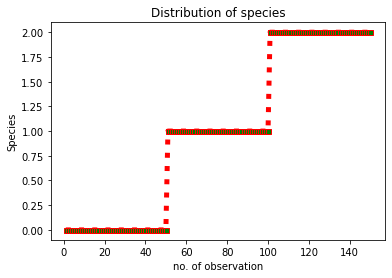

In [71]:
plt.plot(data['Species'],marker = 's' , markerfacecolor = 'green' ,markersize=5, color='red', linewidth=5,linestyle='dotted')
plt.xlabel('no. of observation')
plt.ylabel('Species')
plt.title('Distribution of species')

# **Independent Variables**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


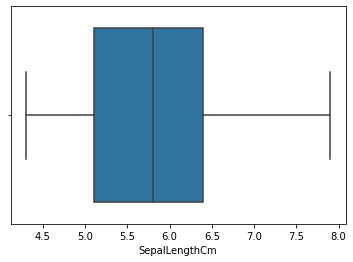

In [72]:
sns.boxplot(data['SepalLengthCm'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


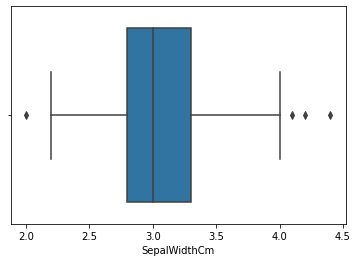

In [73]:
sns.boxplot(data['SepalWidthCm'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


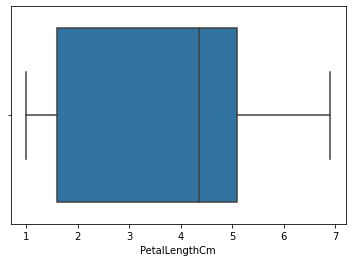

In [74]:
sns.boxplot(data['PetalLengthCm'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


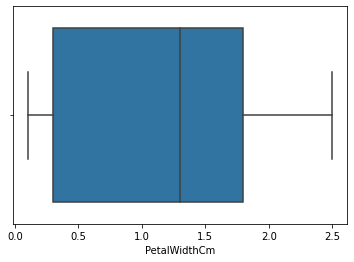

In [75]:
sns.boxplot(data['PetalWidthCm'])

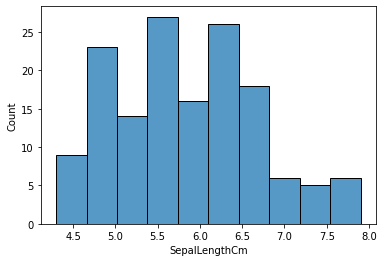

In [76]:
sns.histplot(data['SepalLengthCm'], bins=10, kde=False)

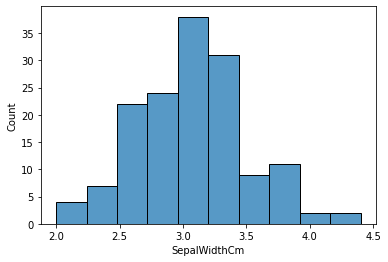

In [77]:
sns.histplot(data['SepalWidthCm'], bins=10, kde=False)

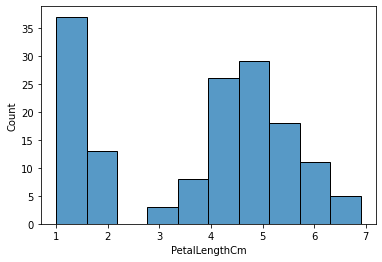

In [78]:
sns.histplot(data['PetalLengthCm'], bins=10, kde=False)

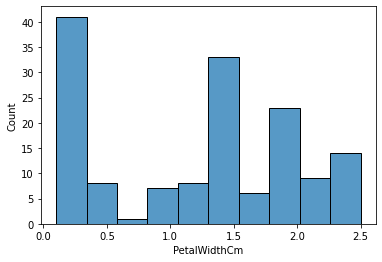

In [79]:
sns.histplot(data['PetalWidthCm'], bins=10, kde=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20717dd450>,
      dtype=object)

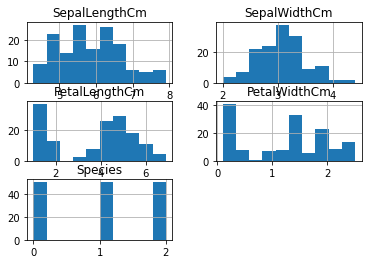

In [80]:
data.hist()

In [81]:
corr=data.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

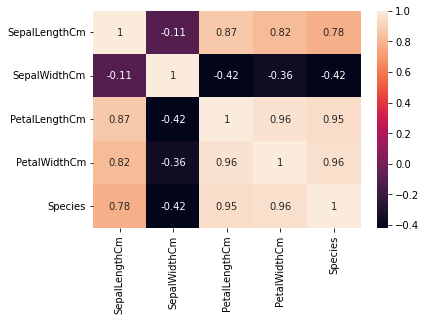

In [82]:
plt.figure()
sns.heatmap(corr,annot=True)
data.columns

In [83]:
#separating dependent and independent varibales
X = data.drop(columns = ['Species'])
Y = data['Species']

# **Splitting dataset**

In [84]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X, Y, train_size = 0.80, stratify = Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# **Model Training**

In [85]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC()

In [86]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

In [87]:
predicted_values[:30]

array([0, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 0,
       2, 1, 0, 0, 0, 2, 1, 0])

# **Evaluation**

In [88]:
from sklearn.metrics import classification_report
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# **Visualize Decision Tree classifier graphically**

In [89]:
!pip install graphviz

In [90]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree = classifier, out_file = 'tree_viz',
                max_depth=None, feature_names = X.columns ,
                label = None, impurity = False )

In [91]:
from graphviz import render
render(  filepath='tree_viz', format = 'png', engine = 'neato')

'tree_viz.png'